# Topics
Types of supervised learning  
Reading data using pandas  
Visualizing data using seaborn  
Linear regression pros and cons  
Form of linear regression  
Preparing X and y using pandas  
Splitting X and y into training and testing sets  
Linear regression in scikit-learn  
Interpreting model coefficients  
Making predictions  
Model evaluation metrics for regression  
Computing the RMSE for our Sales predictions  
Feature selection  
Resources  


1. Types of supervised learning
Classification: Predict a categorical response
Regression: Predict a continuous response
2. Reading data using pandas
Pandas: popular Python library for data exploration, manipulation, and analysis

https://www.ritchieng.com/machine-learning-linear-regression/




## 1. Reading data using pandas
Pandas: popular Python library for data exploration, manipulation, and analysis

Anaconda users: pandas is already installed
Other users: installation instructions

In [0]:
# conventional way to import pandas
import pandas as pd

In [0]:
!git clone https://github.com/erikk-avans/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 0), reused 18 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [0]:
# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv('Machine-Learning/data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [0]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

What are the features?

**TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
What is the response?

**Sales**: sales of a single product in a given market (in thousands of items)
What else do we know?

Because the response variable is continuous, this is a regression problem.
There are 200 observations (represented by the rows), and each observation is a single market.

## 3. Visualizing data using seaborn
Seaborn: Python library for statistical data visualization built on top of Matplotlib



In [0]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

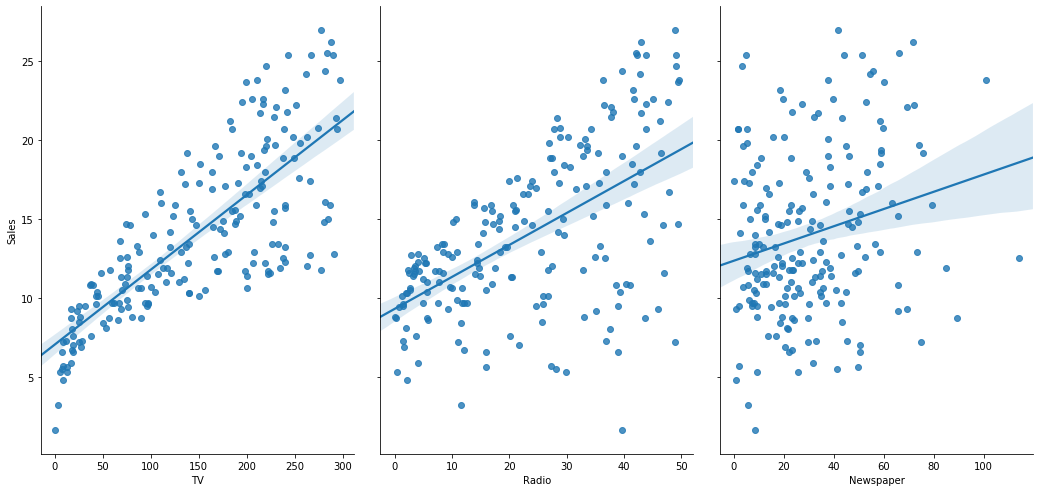

In [0]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

**Linear regression**

Strong relationship between TV ads and sales  
Strong relationship between Radio ads and sales  
Very weak to no relationship between Newspaper ads and sales  

## 3. Preparing X and y using pandas¶
scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays  
However, pandas is built on top of NumPy  
Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [0]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [0]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

## 4. Splitting X and y into training and testing sets

In [0]:
# import  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [0]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## 5. Linear regression in scikit-learn

In [0]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
regressor = LinearRegression()

# fit the model to the training data (learn the coefficients)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 6. Making predictions

In [0]:
# make predictions on the testing set
y_pred = regressor.predict(X_test)

In [0]:
print(y_pred)

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


In [0]:
X_new = pd.DataFrame({'TV': [17],"Radio": [45],'Newspaper':[69]})

# predict for a new observation
regressor.predict(X_new)

array([11.96876185])

## 7. Interpreting model coefficients

In [0]:
# print the intercept and coefficients
print(regressor.intercept_)
print(regressor.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


**y=2.88+0.0466×TV+0.179×Radio+0.00345×Newspaper** 
 
How do we interpret the TV coefficient (0.0466)?  

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.  
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.  
Important notes:  

This is a statement of association, not causation  
If an increase in TV ad spending was associated with a decrease in sales,  β1  would be negative.

## 8. Model evaluation metrics for regression
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.  

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [0]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [0]:
# calculate RSME using scikit-learn
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


In [0]:
# import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.  
Easier to put in context as it's the same units as our response variable